In this notebook, stock market data, particularly for NVDA stocks, will be examined. The stock information will be retrieved using pandas, and different aspects will be visualized. Risk analysis based on historical performance will be conducted, and future stock prices will be predicted using the Long Short Term Memory (LSTM) method. After that Evaly's profit will be calculated with the predicted closing price of NVDA stock

Following parst will be covered along the way:

1.  Data Acquisition
2.  Data Preprocessing
3.	Model Selection and Training
4.	Evaluation and Prediction
5.	Visualization



##**1. Data Acquisition**

In [152]:
#Install financial library to retrieve historical closing prices for NVDA stock
# !pip install -q hvplot
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
!pip install -q yfinance

In [153]:
#Import Necessary Libraries(More Libraries will be imported as per necessity in the corresponding cell later)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [37]:
#Connect Drive to Retrive data
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'1075 (1).docx'			       'Intern- Agreement_Humaira_Afia.pdf'
'2. CV_ Humaira.pdf'		        Letter.gdoc
'CamScanner 01-21-2024 13.35.pdf'       NVDA.csv
 Classroom			       'PMSCS600distribution_Form (1).pdf'
'Colab Notebooks'		        PMSCS600distribution_Form.pdf
'cv rough.gsheet'		        products.json
 Dog				       'Resume (1).gdoc'
'Humaira_Afia_CV (1).pdf'	        Resume.gdoc
'Humaira_Afia_CV (2).pdf'	        Screenshot_2016-07-21-15-16-44-365.jpeg
'HumairaAfiaCV (2).pdf'		        Screenshot_2016-11-05-23-55-50-719.jpeg
 HumairaAfiaCV_bjit.gdoc	       'Screenshot (21).png'
 HumairaAfiaCV_bjit.pdf		        Signature_Bangladesh_Bank.jpg
 Humaira_Afia_CV.pdf		        StockPrice.ipynb
 IMG_20160102_0007_converted.jpg        SUPLIMENTARY_2021127978_pdf.pdf
 IMG_20160102_0009.jpg		       'Thesis Report'
 IMG_20191115_004730_399.jpg	        Untitled.ipynb
 IM

#EValy Data analysis

In [201]:
#Read Json file evaly dataset
import json

# Specify the path to your JSON file
file_path = 'products.json'  # Replace with your JSON file path

# Open and load JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Print the data to verify
print(data)


[{'name': 'Aprilia FX-150 150 CC Motorbike', 'offer_price': '129150', 'regular_price': '215250'}, {'name': 'Runner UM XTREET 150CC Motorbike', 'offer_price': '103800', 'regular_price': '173000'}, {'name': 'RUNNER BOLT 165CC Motorbike', 'offer_price': '101400', 'regular_price': '169000'}, {'name': 'RUNNER KNIGHT-RIDER- V2 150CC Motorbike', 'offer_price': '99600', 'regular_price': '166000'}, {'name': 'RUNNER KNIGHT-RIDER 150CC Motorbike', 'offer_price': '93600', 'regular_price': '156000'}, {'name': 'RUNNER TURBO 125CC Motorbike', 'offer_price': '78000', 'regular_price': '130000'}, {'name': 'RUNNER ROYAL-PLUS 110CC Motorbike', 'offer_price': '60600', 'regular_price': '101000'}, {'name': 'RUNNER KITE-PLUS 110CC Motorbike', 'offer_price': '54600', 'regular_price': '91000'}, {'name': 'RUNNER SKOOTY 110CC Motorbike', 'offer_price': '60000', 'regular_price': '100000'}, {'name': 'RUNNER BULLET- V2 100CC Motorbike', 'offer_price': '65400', 'regular_price': '109000'}, {'name': 'RUNNER AD80S-DELUX

In [202]:
# Load JSON data into a DataFrame
orders_df = pd.read_json(file_path)

# Display the DataFrame
print(orders_df)


                                                 name  offer_price  \
0                     Aprilia FX-150 150 CC Motorbike       129150   
1                    Runner UM XTREET 150CC Motorbike       103800   
2                         RUNNER BOLT 165CC Motorbike       101400   
3             RUNNER KNIGHT-RIDER- V2 150CC Motorbike        99600   
4                 RUNNER KNIGHT-RIDER 150CC Motorbike        93600   
..                                                ...          ...   
57               MIBK Open Full Face 603 Helmet Black          575   
58               awei Car Charger C707 White or Black          325   
59  SUZUKI PRINTED WIND BREAKER, MONSTAR PRINTED P...         1750   
60  PULSAR PRINTED WIND BREAKER, PULSAR PRINTED PO...         1750   
61  ENEOS PRINTED WIND BREAKER, YAMAHA PRINTED POL...         1750   

    regular_price  
0          215250  
1          173000  
2          169000  
3          166000  
4          156000  
..            ...  
57           1150  

In THIS CODE BLOCK, average revenue per order will be calculated by taking the mean of the offer_price for each product, calculated Weekly Revenue, Added 2-Month Delay for Liquid Money Accumulatio, aggregated revenue to each Liquid Week and finally calculated the total lequide money at the end of 3 years

In [203]:
# Calculate average offer price as the revenue per order
avg_revenue_per_order = np.mean([orders_df['offer_price'] for product in data])

# Initial parameters
initial_orders = 1000  # Orders in week 1
growth_rate = 0.20  # 20% increase per week
weeks_per_year = 52
years = 3
total_weeks = weeks_per_year * years

# Calculate the number of orders per week over 3 years
orders_per_week = [initial_orders]
for i in range(1, total_weeks):
    orders_per_week.append(orders_per_week[-1] * (1 + growth_rate))

# Create a DataFrame to handle the data
orders_df = pd.DataFrame({
    'Week': range(1, total_weeks + 1),
    'Orders': orders_per_week
})

# Calculate weekly revenue
orders_df['Weekly_Revenue'] = orders_df['Orders'] * avg_revenue_per_order

# Add 2-month delay to liquid money accumulation
orders_df['Liquid_Week'] = orders_df['Week'] + 8
orders_df['Liquid_Week'] = orders_df['Liquid_Week'].apply(lambda x: min(x, total_weeks))

# Aggregate revenue to each liquid week
liquid_money_df = orders_df.groupby('Liquid_Week')['Weekly_Revenue'].sum().reset_index()

# Calculate the total liquid money at the end of 3 years
total_liquid_money = liquid_money_df['Weekly_Revenue'].sum()

##Statistical Graph plotting for Evaly over weeks

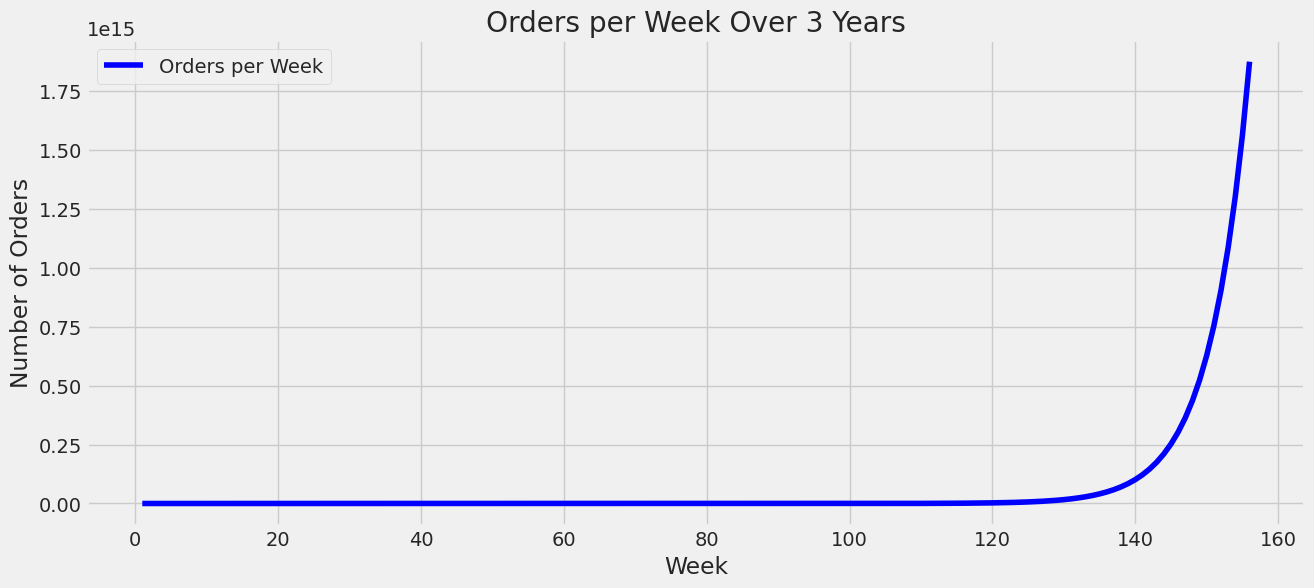

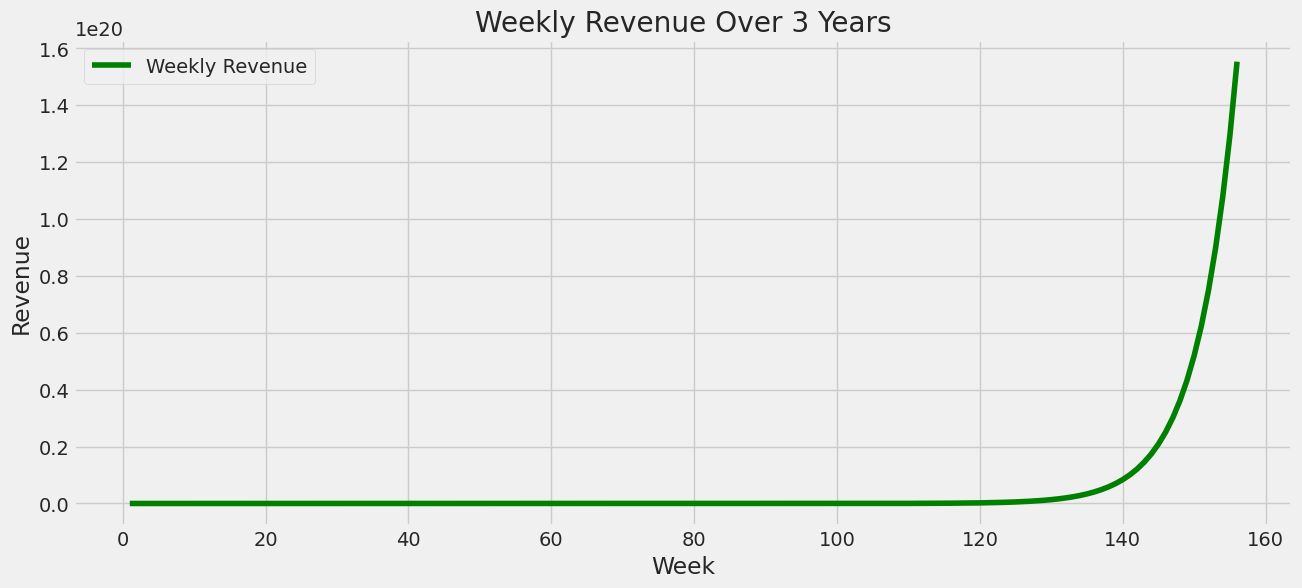

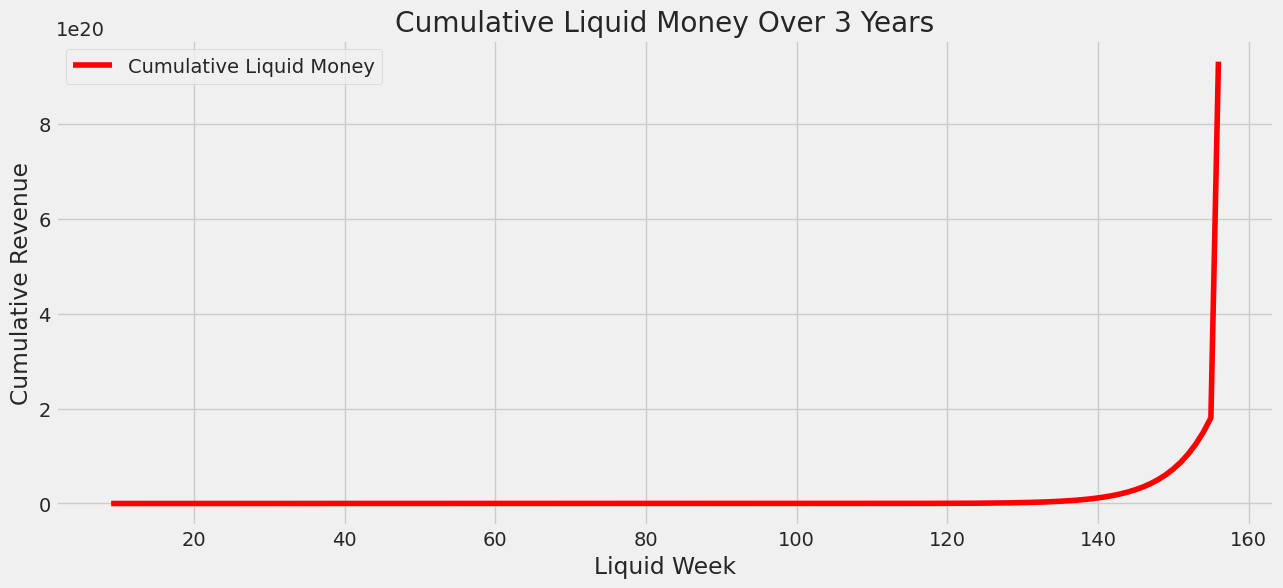

In [188]:
# Plot Orders per Week
plt.figure(figsize=(14, 6))
plt.plot(orders_df['Week'], orders_df['Orders'], label='Orders per Week', color='blue')
plt.title('Orders per Week Over 3 Years')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

# Plot Weekly Revenue
plt.figure(figsize=(14, 6))
plt.plot(orders_df['Week'], orders_df['Weekly_Revenue'], label='Weekly Revenue', color='green')
plt.title('Weekly Revenue Over 3 Years')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Plot Liquid Money Accumulation
plt.figure(figsize=(14, 6))
plt.plot(liquid_money_df['Liquid_Week'], liquid_money_df['Weekly_Revenue'].cumsum(), label='Cumulative Liquid Money', color='red')
plt.title('Cumulative Liquid Money Over 3 Years')
plt.xlabel('Liquid Week')
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.grid(True)
plt.show()

#NVDA data analysis and Stock Price Prediction

In [208]:
#Read NVDA CSV Data file and find out the size of the data
import pandas as pd
df = pd.read_csv('NVDA.csv')
df.shape

(6116, 7)

In [209]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6.116000e+03
mean,53.052266,54.017201,52.031700,53.064741,52.794253,6.221933e+07
std,121.267334,123.423982,118.835114,121.183234,121.214864,4.316714e+07
min,0.608333,0.656667,0.600000,0.614167,0.563377,4.564400e+06
25%,2.959688,3.027500,2.875000,2.950391,2.707880,3.615840e+07
50%,4.683750,4.747500,4.608750,4.682500,4.389289,5.206235e+07
75%,42.101873,42.645625,41.500000,42.102499,41.741090,7.465490e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,9.230856e+08


In [210]:
#Show 1st and last 10 rows of the datframe
print (df.tail(10))
print (df.head(10))

            Date        Open        High         Low       Close   Adj Close  \
6106  2024-04-11  874.200012  907.390015  869.260010  906.159973  906.159973   
6107  2024-04-12  896.989990  901.750000  875.299988  881.859985  881.859985   
6108  2024-04-15  890.979980  906.130005  859.289978  860.010010  860.010010   
6109  2024-04-16  864.330017  881.179993  860.640015  874.150024  874.150024   
6110  2024-04-17  883.400024  887.750000  839.500000  840.349976  840.349976   
6111  2024-04-18  849.700012  861.900024  824.020020  846.710022  846.710022   
6112  2024-04-19  831.500000  843.239990  756.059998  762.000000  762.000000   
6113  2024-04-22  781.039978  800.729980  764.000000  795.179993  795.179993   
6114  2024-04-23  807.690002  827.690002  802.640015  824.229980  824.229980   
6115  2024-04-24  839.500000  840.820007  791.830017  796.770020  796.770020   

        Volume  
6106  43163700  
6107  42488900  
6108  44307700  
6109  37045300  
6110  49540000  
6111  44726000  


In [211]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6116 non-null   object 
 1   Open       6116 non-null   float64
 2   High       6116 non-null   float64
 3   Low        6116 non-null   float64
 4   Close      6116 non-null   float64
 5   Adj Close  6116 non-null   float64
 6   Volume     6116 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.6+ KB


## Data Preprocessing & Feature Engineering

This part will demonstrate change in price of the stock overtime and Risk analysis of the stock

In [ ]:
# Set the date column as the index of the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#Visualizations for the closing price and the volume traded

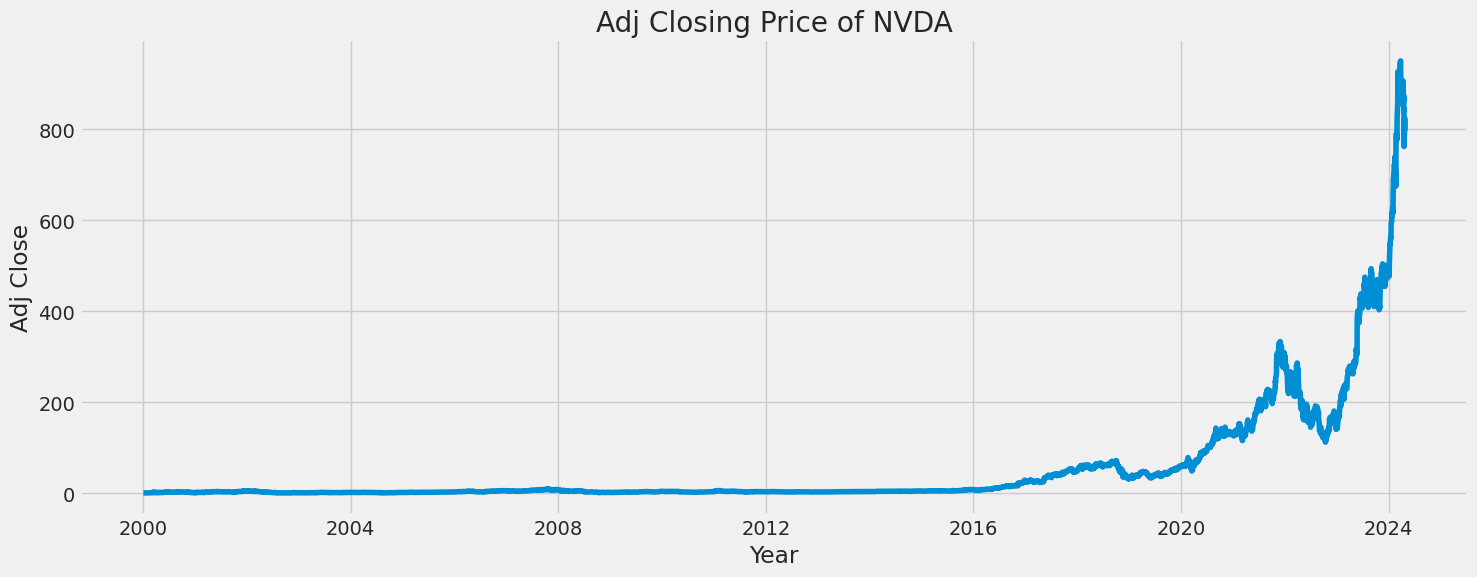

In [159]:
# Plot the adjusted closing prices

import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.plot(df.index, df['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel('Year')
plt.title("Adj Closing Price of NVDA")
plt.tight_layout()
plt.show()


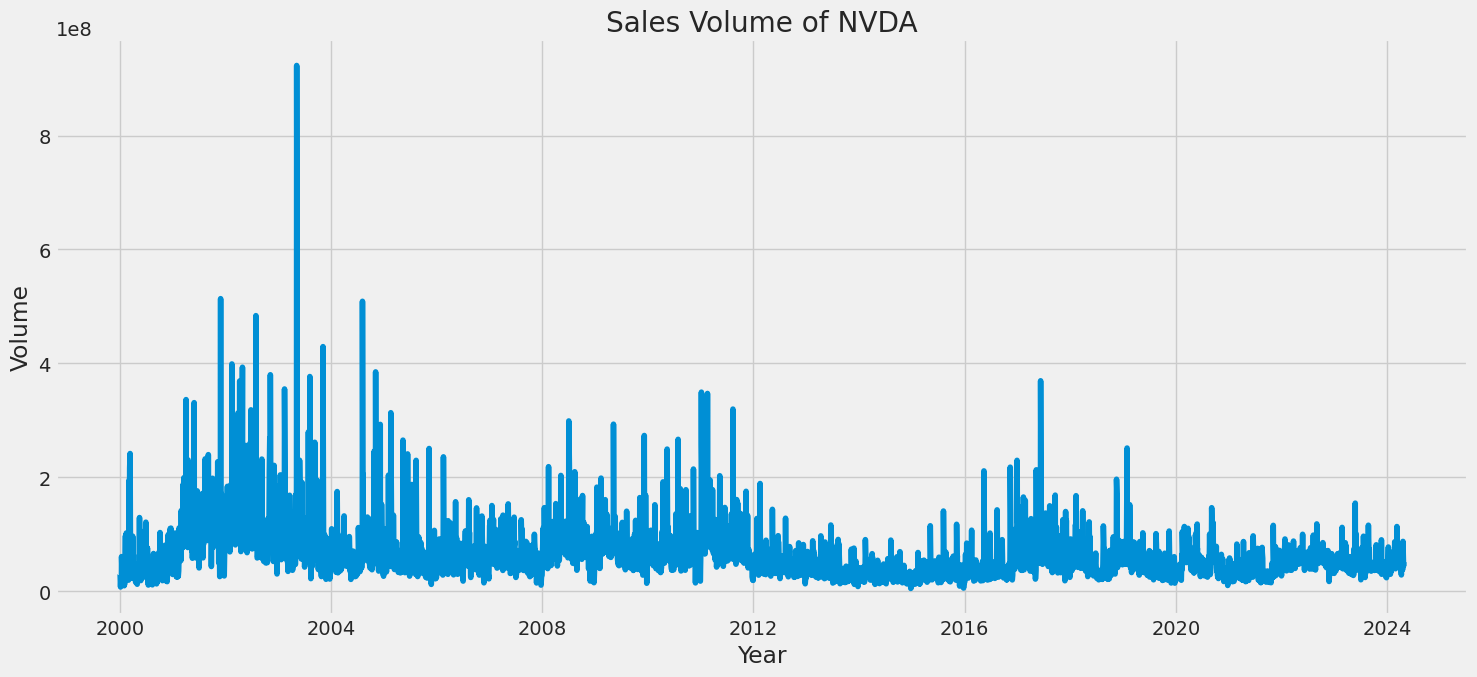

In [160]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df.index, df['Volume'])
plt.ylabel('Volume')
plt.xlabel('Year')
plt.title(f"Sales Volume of NVDA")
plt.tight_layout()
plt.show()


# Moving average of the stock


In [161]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()


In [162]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')


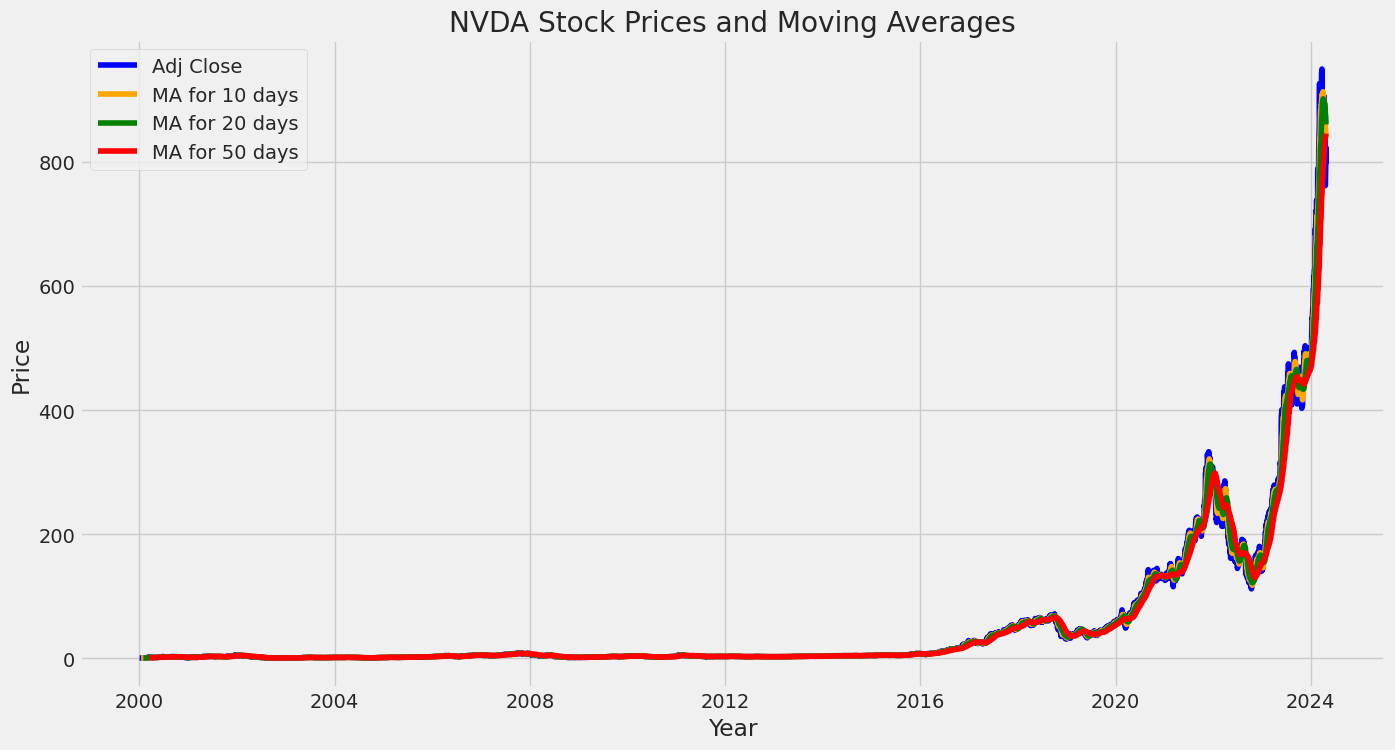

In [163]:
import matplotlib.pyplot as plt
company_name = 'NVDA'

plt.figure(figsize=(15, 8))
plt.plot(df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df['MA for 10 days'], label='MA for 10 days', color='orange')
plt.plot(df['MA for 20 days'], label='MA for 20 days', color='green')
plt.plot(df['MA for 50 days'], label='MA for 50 days', color='red')
plt.title(f'{company_name} Stock Prices and Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**Risk Analysis: Daily return of the stock on average**

*Daily return on a stock is used to measure the day to day performance of stocks, it is the price of stocks at today's closure compared to the price of the same stock at yesterday's closure. Positive daily return means appreciation in stock price on daily comparison.*

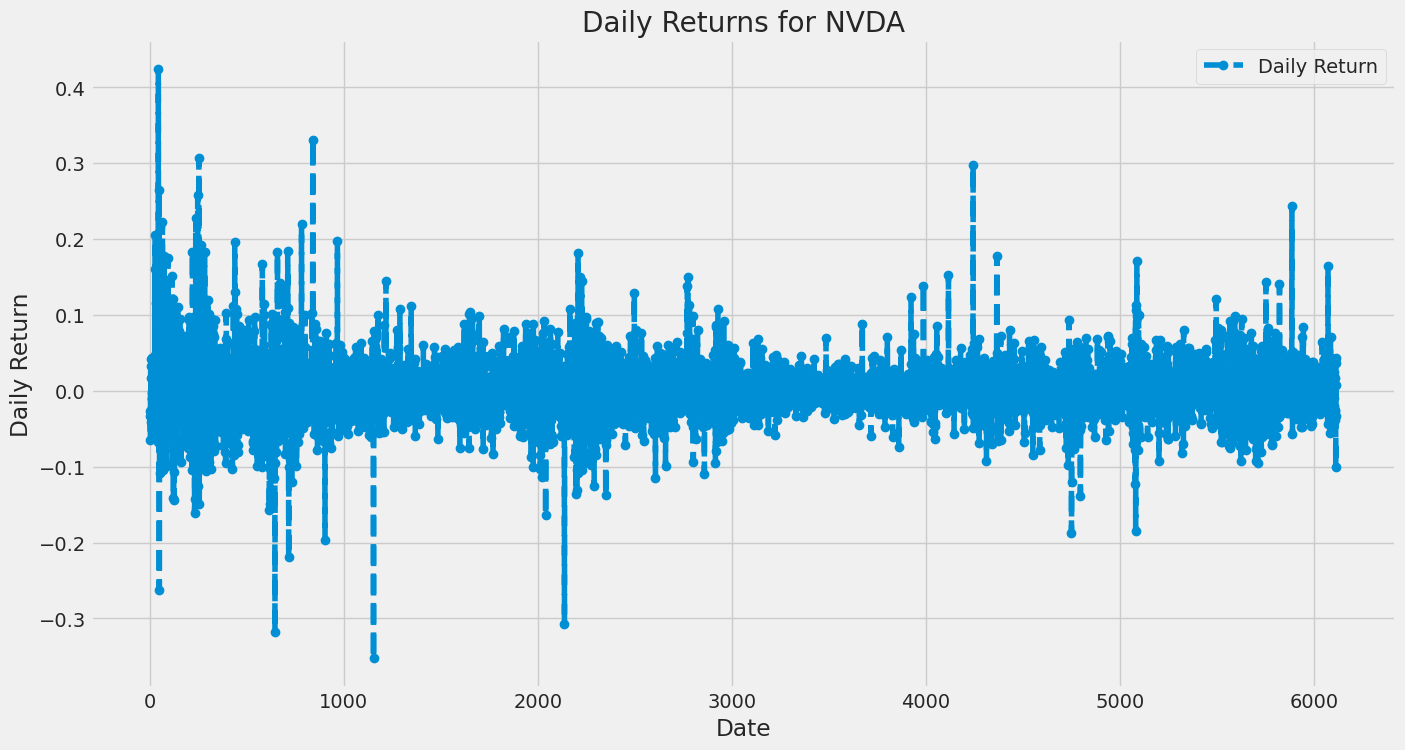

In [165]:
# We'll use pct_change to find the percent change for each day
company_name = 'NVDA'

# Calculate daily returns
df['Daily Return'] = df['Adj Close'].pct_change()

# Plot the daily return percentage
plt.figure(figsize=(15, 8))
plt.plot(df['Daily Return'], linestyle='--', marker='o', label='Daily Return')
plt.title(f'Daily Returns for {company_name}')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(loc='best')
plt.grid(True)
plt.show()


*Now let's get an overall look at the average daily return using a histogram. seaborn will be used to create both a histogram and kde plot on the same figure.*

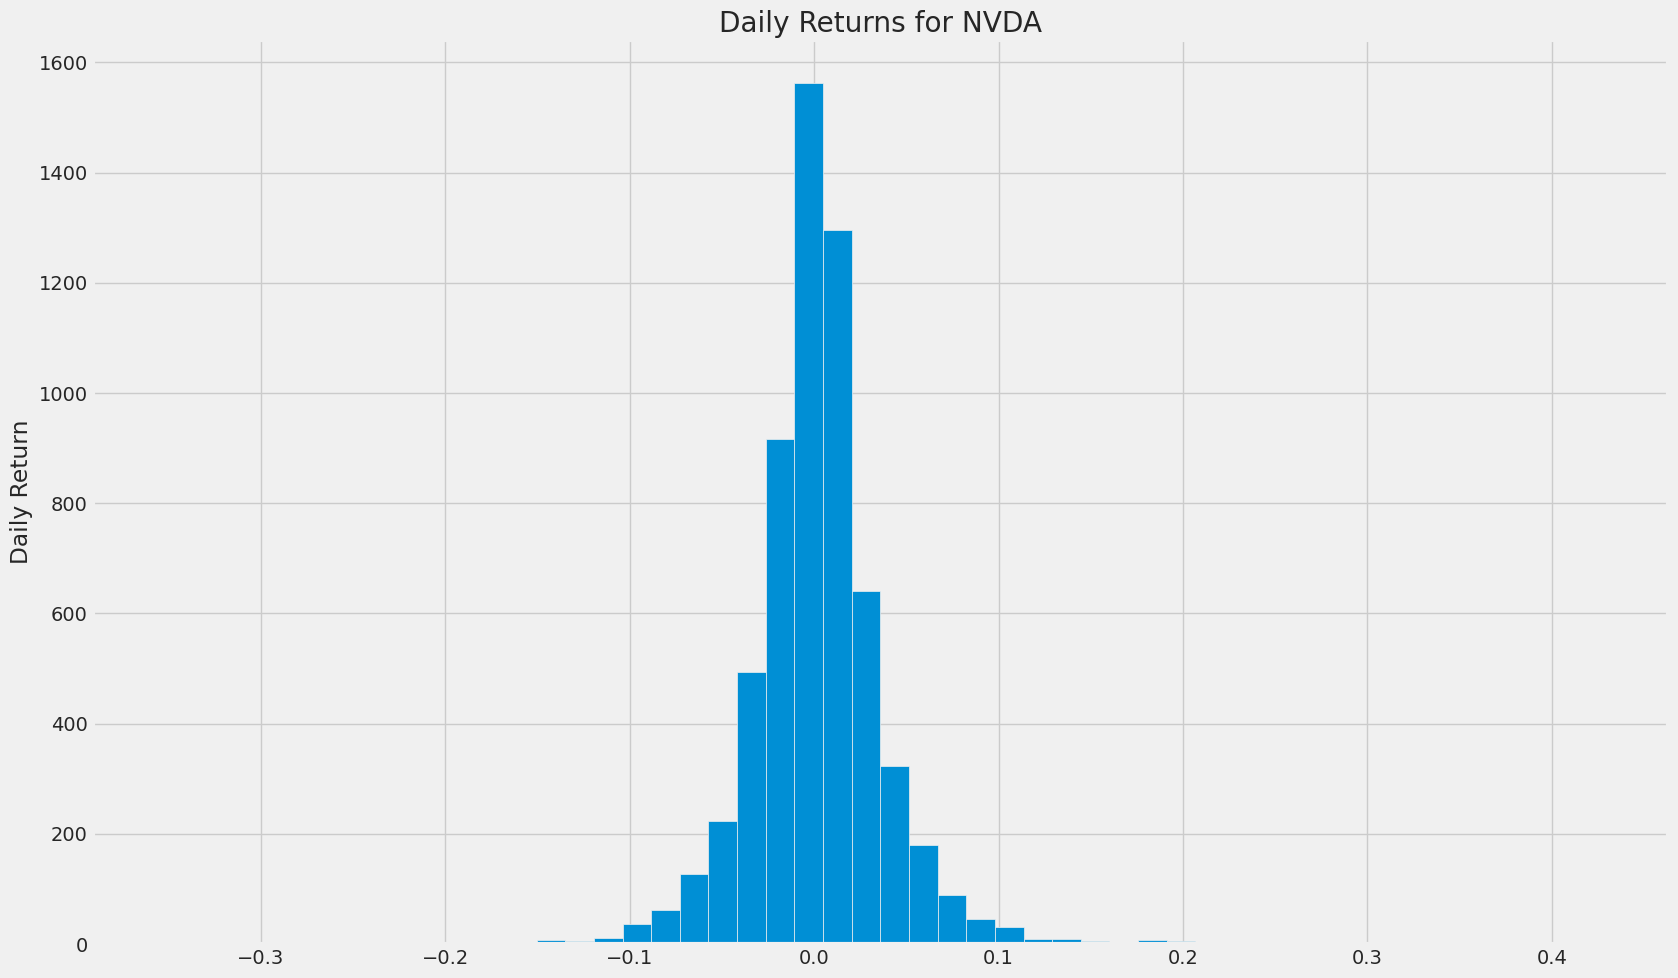

In [166]:
plt.figure(figsize=(17, 10))
df['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'Daily Returns for {company_name}')

plt.tight_layout()

#Correlation between different stocks closing prices:

*If we want to analyze the returns of all the stocks, we can compare the

1.   List item
2.   List item

daily percentage return of two stocks to check how correlated.
As there is only one available data for one stock we can see a sotck compared to itself in the following code*

In [168]:
df = pd.read_csv('NVDA.csv', index_col='Date', parse_dates=True)

In [170]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock symbol and the date range
stock_symbol = 'NVDA'  # Replace with your desired stock symbol
start = '2020-01-01'
end = '2023-01-01'

# Calculate daily returns
daily_returns = df.pct_change()

# Display the first few rows of the daily returns DataFrame
print(daily_returns.head())



                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2000-01-03       NaN       NaN       NaN       NaN        NaN       NaN
2000-01-04 -0.026455 -0.031496 -0.019830 -0.026702  -0.026701 -0.001436
2000-01-05 -0.038043 -0.024391  0.004335 -0.032922  -0.032922 -0.373163
2000-01-06 -0.004237 -0.020833 -0.090647 -0.065248  -0.065249 -0.360347
2000-01-07 -0.069503 -0.039717  0.022152  0.016692   0.016693 -0.409163


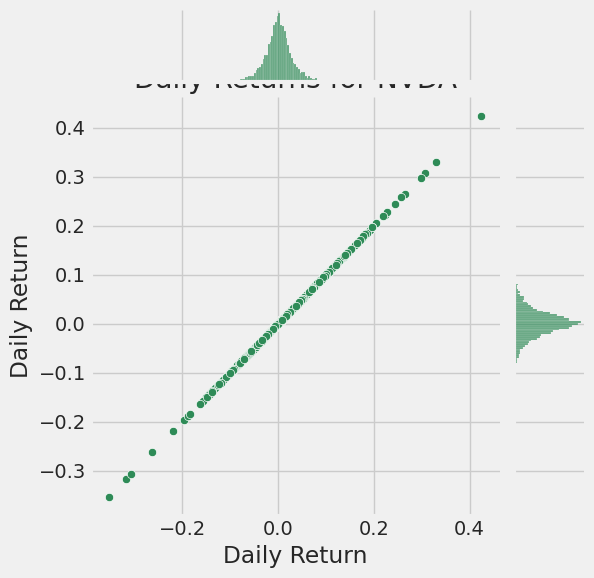

In [171]:
# Extract a specific column for plotting (e.g., 'Close')
# Adjust 'Close' to the column you want to visualize
sns.jointplot(x=daily_returns['Close'], y=daily_returns['Close'], kind='scatter', color='seagreen')

plt.title(f'Daily Returns for {stock_symbol}')
plt.xlabel('Daily Return')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

 It's interesting to see that NVDA Stock is positively correlated.

# How much value do we put at risk by investing in a particular stock?

*One of the most basic ways to quantify risk is using the information we've gathered on daily percentage returns: By comparing the expected return (mean) with the standard deviation (std) of the daily returns.*

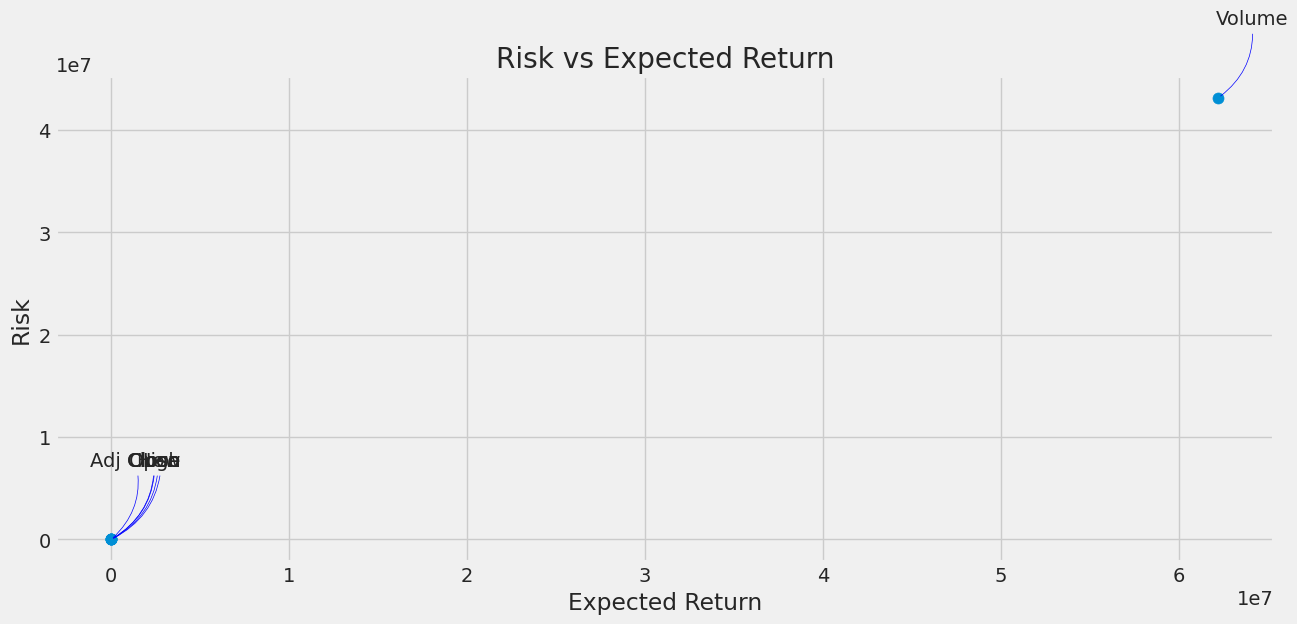

In [172]:
# Drop rows with NaN values
rets = df.dropna()

# Define the area of the scatter plot markers
area = np.pi * 20

# Create a scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(rets.mean(), rets.std(), s=area)

# Label the axes
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Annotate each stock
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Show the plot
plt.title('Risk vs Expected Return')
plt.grid(True)
plt.show()


It is visible that there is low risk and low return of NVDA Stock

##3. Predicting the closing price stock price of NVDA:

*This part will cover the training process and Evaluation and Prediction*

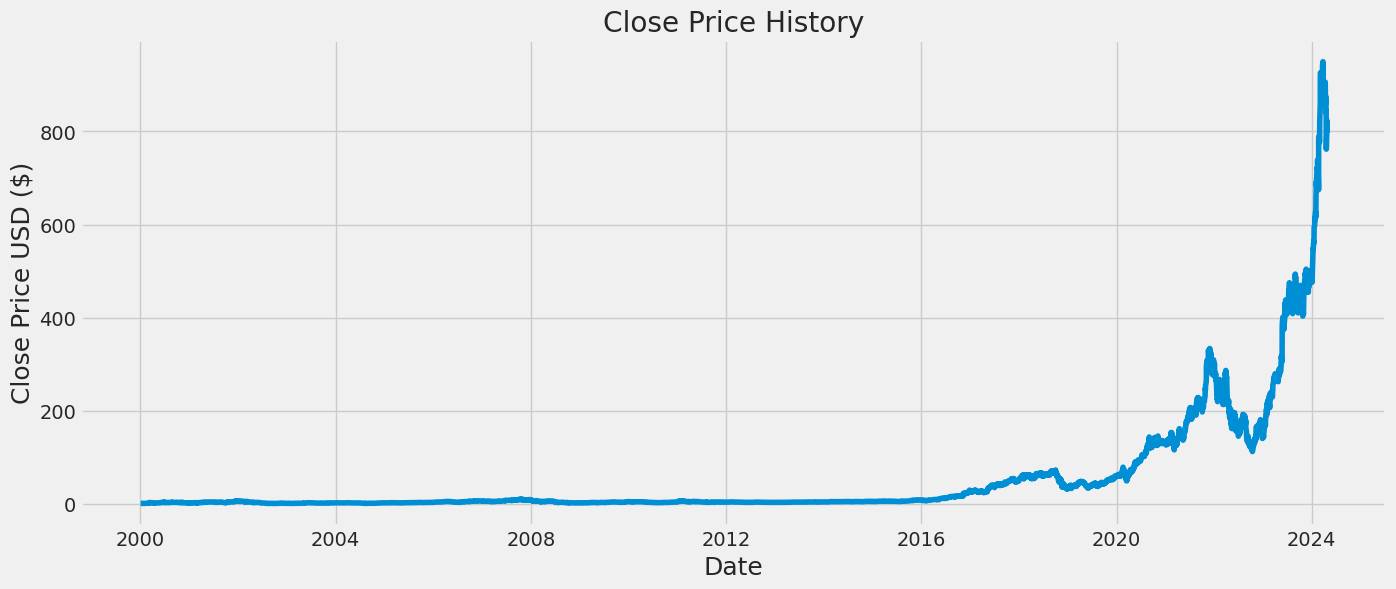

In [173]:
#Plot Closing Price over Year
plt.figure(figsize=(15,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [174]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

window_size = 60
training_data_len

5811

In [175]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# create scaler
scaler = StandardScaler()
# fit and transform in one step
scaled_data = scaler.fit_transform(dataset)

print ('scaled_data.shape',len(scaled_data))
scaled_data


scaled_data.shape 6116


array([[-0.4298758 ],
       [-0.43009071],
       [-0.4303486 ],
       ...,
       [ 6.124411  ],
       [ 6.36415012],
       [ 6.13753292]])

**Train, test, validation data split**

In [176]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len)]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size + 1:
        print('x_train',x_train)
        print('\ny_train',y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print ('x_train.shape:',x_train.shape)

x_train [array([-0.4298758 , -0.43009071, -0.4303486 , -0.4308429 , -0.4307247 ,
       -0.43048829, -0.43078918, -0.43097185, -0.43068172, -0.43037009,
       -0.43004773, -0.43012294, -0.43014444, -0.4302304 , -0.43057426,
       -0.43063873, -0.43093961, -0.43130497, -0.43149838, -0.43155212,
       -0.43140167, -0.431219  , -0.43111154, -0.43095036, -0.43138018,
       -0.43106856, -0.43089663, -0.42945671, -0.42932777, -0.42795233,
       -0.42833917, -0.4278986 , -0.42754399, -0.42634048, -0.42666286,
       -0.42659838, -0.42670584, -0.4274043 , -0.42747952, -0.42692075,
       -0.42724312, -0.42796308, -0.42780189, -0.42786636, -0.42360035,
       -0.42348215, -0.42068023, -0.41763653, -0.41226371, -0.41899047,
       -0.41976416, -0.4217333 , -0.42075276, -0.42076351, -0.42161241,
       -0.42149421, -0.42120407, -0.42190254, -0.42295561, -0.42407316])]

y_train [-0.4249865386886139]

x_train [array([-0.4298758 , -0.43009071, -0.4303486 , -0.4308429 , -0.4307247 ,
       -0.43

In [177]:
print (x_train.shape[1])

60


**Model Building**

**Input Layer:** *input_layer = Input(shape=input_shape, name="input") where input_shape is a tuple (timesteps, features).*

**Bidirectional LSTM Layers:** *Used for capturing dependencies in both forward and backward directions. return_sequences=True in the first LSTM layer returns sequences for the next LSTM layer*

**Dropout:** *Used dropout=0.5 in the LSTM layer to avoid model overfitting*

**Dense Layers:** *The Dense layers add fully connected layers to the network. The final Dense layer outputs a single value, typically used for regression tasks.*

x_train is a 3D numpy array where the second dimension represents the number of timesteps, and the third dimension represents the number of features. Input_shape is adjusted as needed for my data.

In [178]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(x_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)

    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)

    x = tf.keras.layers.Dense(25 , activation="relu", name ="dense_1")(x)

    output = tf.keras.layers.Dense(1, name="last_dense")(x)

    model = tf.keras.Model(inputs=input, outputs=output)

    return model

LSTM_model = build_LSTM_model()
LSTM_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 60, 256)             │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           3,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ last_dense (Dense)                   │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 300,723 (1.15 MB)

 Trainable params: 300,723 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [179]:
epochs = 10
batch_size = 20
early_stopping_patience = 17


# Compile the model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = LSTM_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 81s 262ms/step - loss: 0.0145
Epoch 2/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 86s 276ms/step - loss: 0.0043
Epoch 3/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 65s 218ms/step - loss: 0.0027
Epoch 4/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - loss: 0.0032
Epoch 5/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - loss: 0.0023
Epoch 6/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 81s 215ms/step - loss: 0.0019
Epoch 7/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 82s 213ms/step - loss: 0.0016
Epoch 8/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 61s 211ms/step - loss: 0.0016
Epoch 9/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 82s 210ms/step - loss: 0.0014
Epoch 10/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 61s 211ms/step - loss: 0.0015


dict_keys(['loss'])


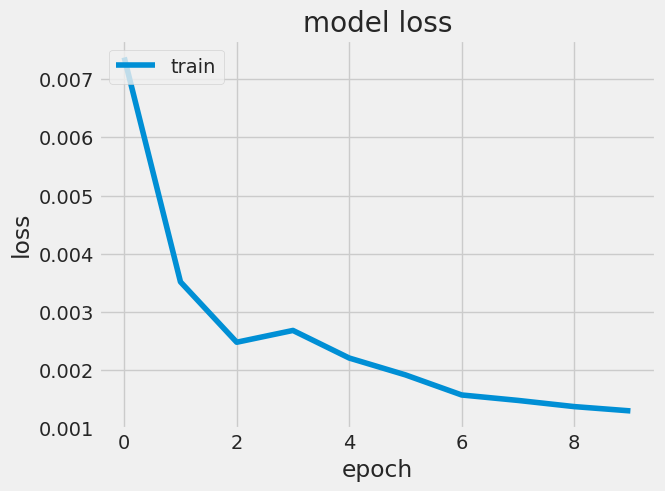

In [180]:
# list all data in history
print(history.history.keys())

# summarize history for loss

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [181]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - window_size: ]
print ('len(test_data):', len(test_data))

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = LSTM_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data): 365
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step


127.01583065912551

##4. Visualize the actual historical closing prices alongside the predicted values to analyze the model's accuracy.

<ipython-input-182-aeddc951852c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


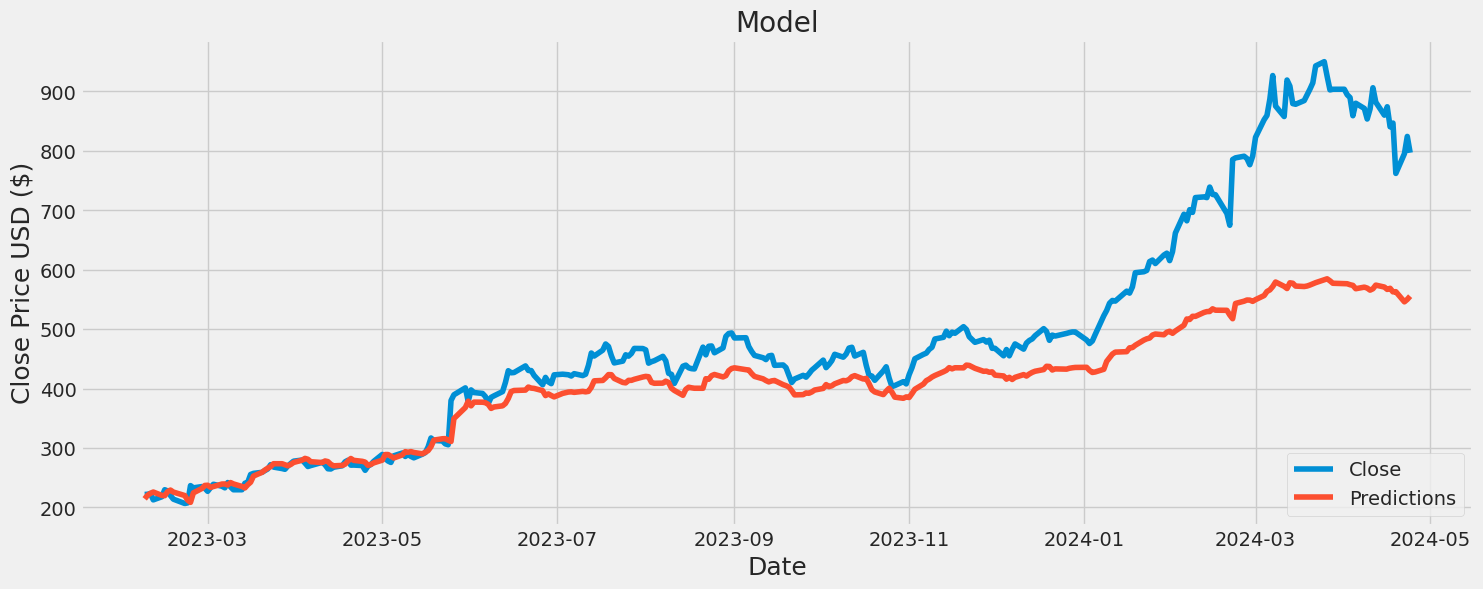

In [182]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Close', 'Predictions'], loc='lower right')
plt.show()

In [183]:
# Show the valid and predicted prices
test

,Close,Predictions
Date,,
2023-02-07,221.729996,214.374268
2023-02-08,222.050003,220.365646
2023-02-09,223.369995,223.643860
2023-02-10,212.649994,225.851013
2023-02-13,217.880005,220.144669
...,...,...
2024-04-18,846.710022,562.638062
2024-04-19,762.000000,562.952637
2024-04-22,795.179993,545.877686


In [196]:
# Summary Stats
products.describe()

,offer_price,regular_price
count,62.000000,62.000000
mean,82802.887097,136329.112903
std,84909.091230,139131.565903
min,14.000000,25.000000
25%,1750.000000,2750.000000
50%,69052.000000,113250.000000
75%,109449.250000,179425.000000
max,328180.000000,538000.000000


## Investment and Profit Calculation based on Stock price Prediction

In [204]:
# Calculations
months = total_weeks // 4  # Approximate number of months
monthly_investment = total_liquid_money / months
monthly_stock_prices = np.linspace(real_stock_price[-1], predicted_stock_price[-1], months)

# Calculate investment value over time
investment_values = np.zeros(months)
total_investment_value = 0

for i in range(months):
    total_investment_value += monthly_investment * (monthly_stock_prices[i] / real_stock_price[-1])
    investment_values[i] = total_investment_value

# Total profit
total_profit = total_investment_value - total_liquid_money

##Cumulative Profit calculation and visualization over time

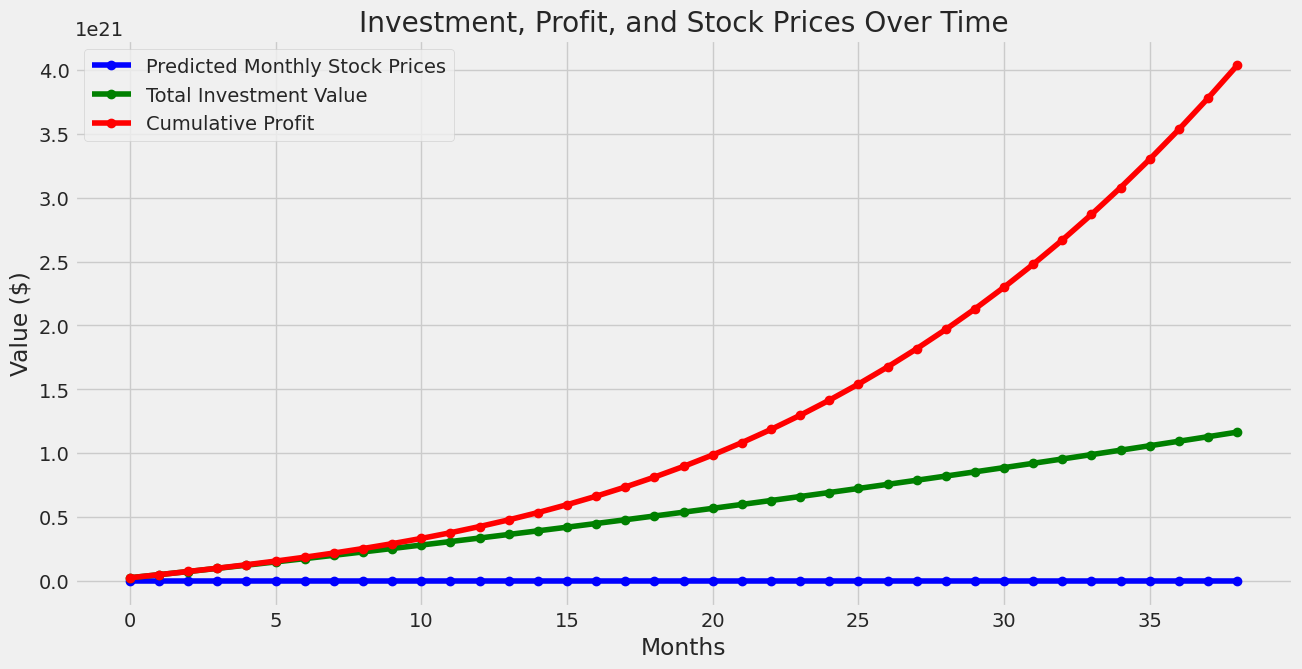

Total Profit after 3 years: $4037494697661308600320.00


In [205]:
# Calculate cumulative profit over time
cumulative_profit = np.cumsum(investment_values - (monthly_investment * np.arange(months)))

# Plotting
plt.figure(figsize=(14, 7))

# Plot monthly stock prices
plt.plot(range(months), monthly_stock_prices, label='Predicted Monthly Stock Prices', color='blue', marker='o')

# Plot investment values over time
plt.plot(range(months), investment_values, label='Total Investment Value', color='green', marker='o')

# Plot cumulative profit over time
plt.plot(range(months), cumulative_profit, label='Cumulative Profit', color='red', marker='o') # Now cumulative_profit is an array

plt.xlabel('Months')
plt.ylabel('Value ($)')
plt.title('Investment, Profit, and Stock Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Print the total profit
total_profit = cumulative_profit[-1]  # Total profit is the last value in cumulative_profit array
print(f"Total Profit after 3 years: ${total_profit:.2f}")